##  Import Libraries

In [1]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB

## Import Data

In [ ]:
df=pd.read_csv('creditcard.csv')
df.head().T

## Preprocessing Data and statistics

###  Data info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

D:\Program Files\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

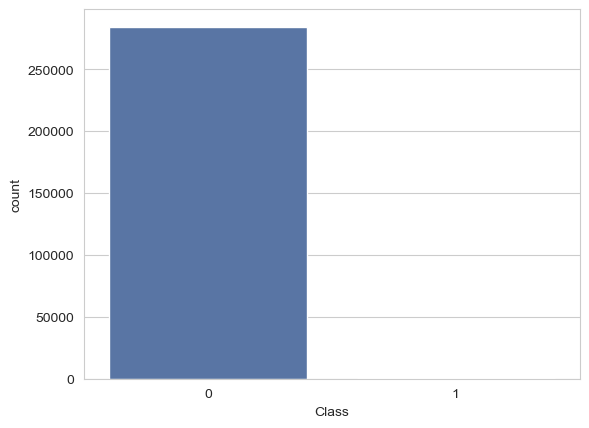

In [ ]:
sns.countplot('Class', data=df ,palette =("deep"))


In [ ]:
Non_frauds_df = df[df['Class']==0]
frauds_df = df[df['Class']==1]

In [ ]:
len(Non_frauds_df)

284315

In [ ]:
len(frauds_df)

492

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### Missing Values

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values

### Outliers

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Box Plot visualization

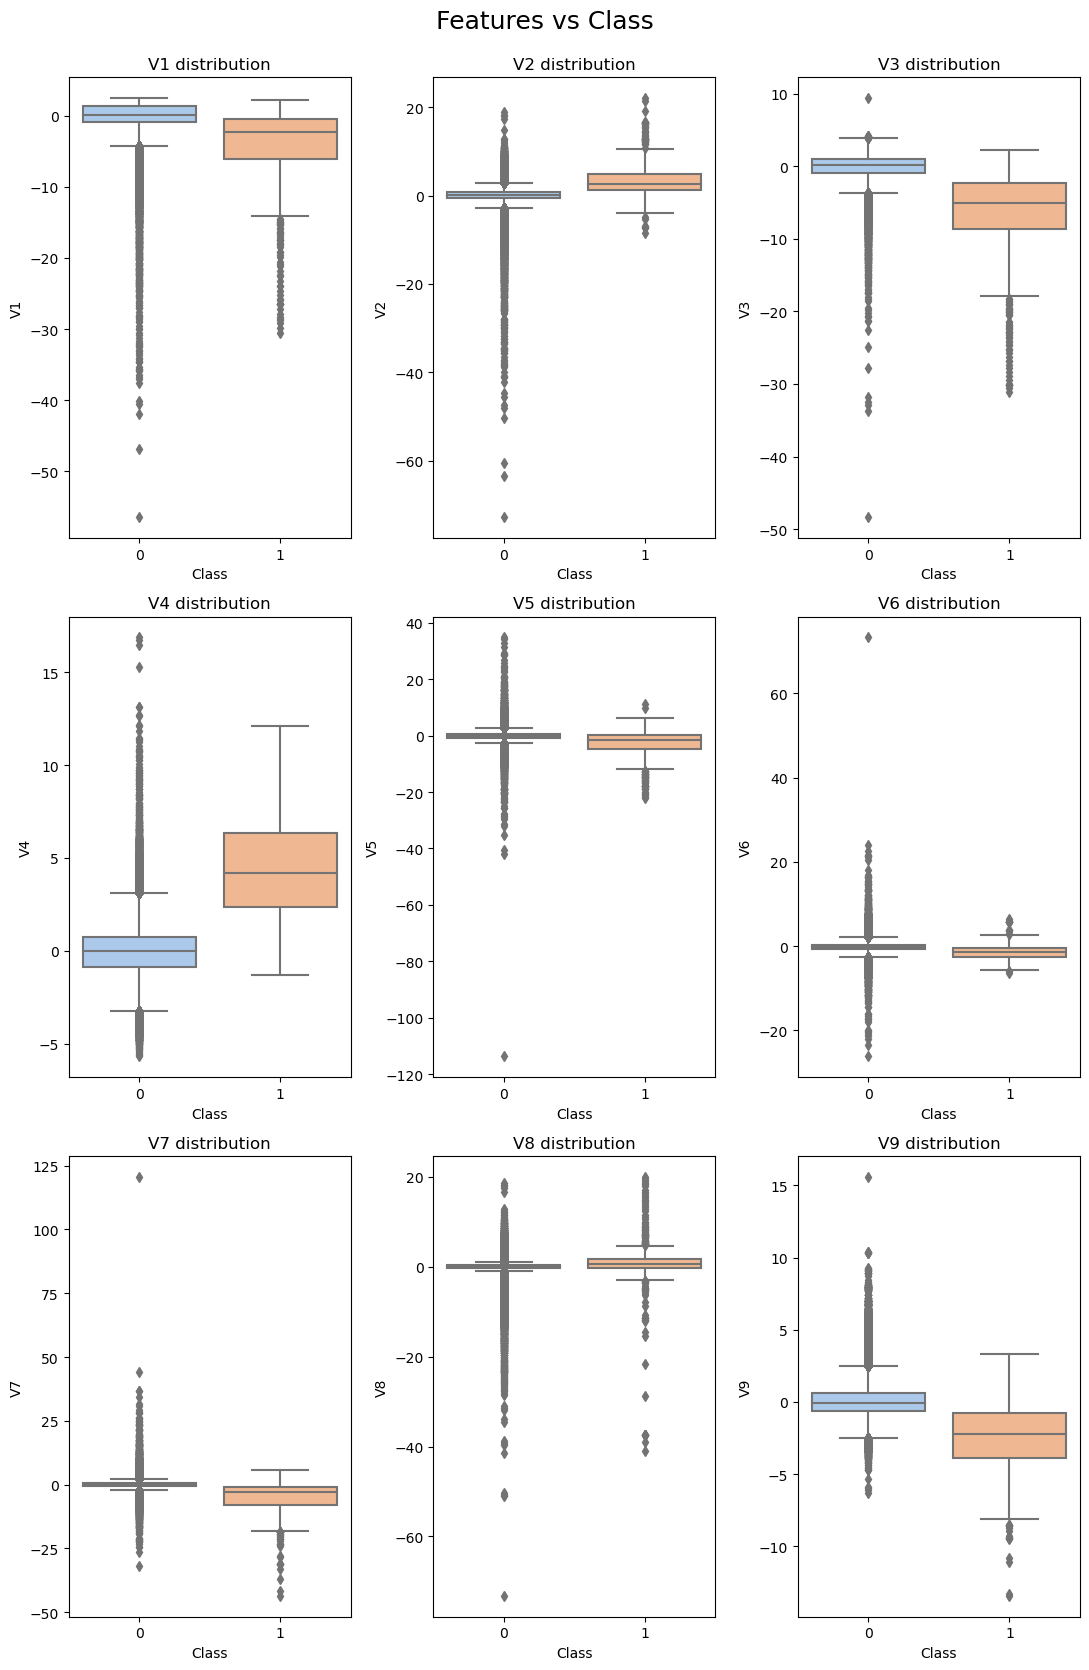

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V1', palette='pastel')
axes[0,0].set_title("V1 distribution");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V2', palette='pastel')
axes[0,1].set_title("V2 distribution");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V3', palette='pastel')
axes[0,2].set_title("V3 distribution");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V4', palette='pastel')
axes[1,0].set_title("V4 distribution");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V5', palette='pastel')
axes[1,1].set_title("V5 distribution");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V6', palette='pastel')
axes[1,2].set_title("V6 distribution");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', palette='pastel')
axes[2,0].set_title("V7 distribution");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V8', palette='pastel')
axes[2,1].set_title("V8 distribution");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V9', palette='pastel')
axes[2,2].set_title("V9 distribution");

plt.tight_layout()

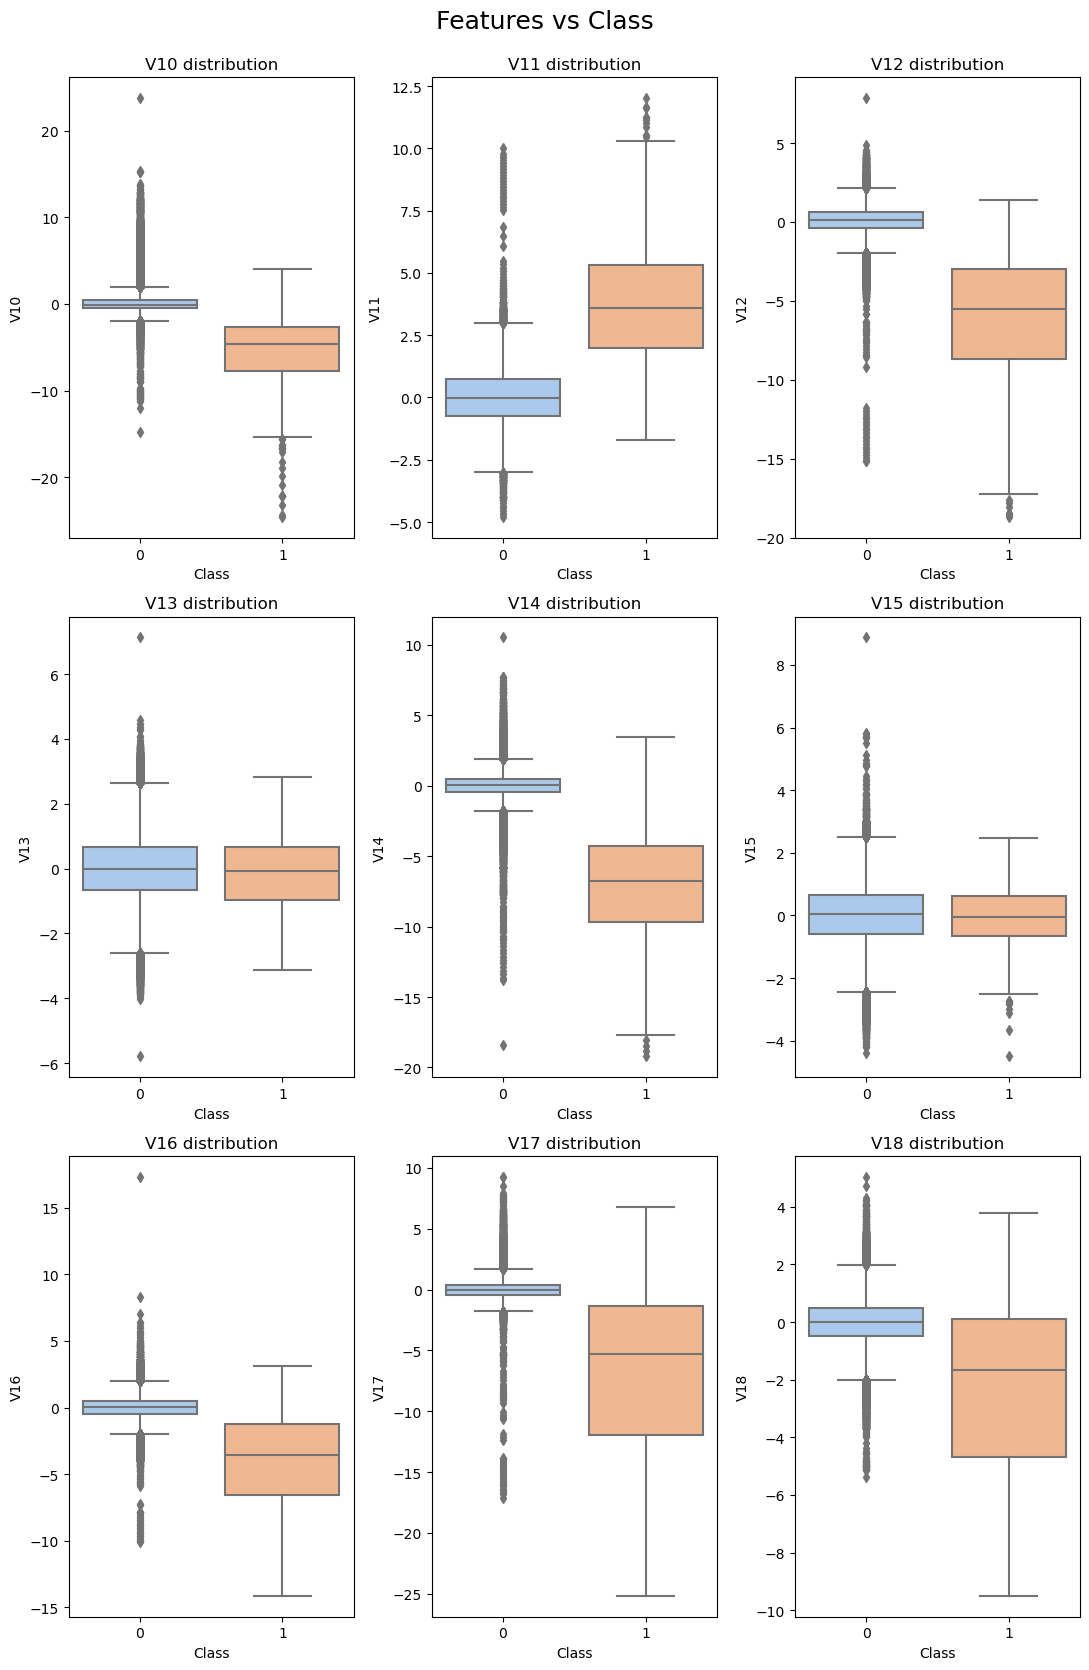

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V10', palette='pastel')
axes[0,0].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V11', palette='pastel')
axes[0,1].set_title("V11 distribution");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='pastel')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V13', palette='pastel')
axes[1,0].set_title("V13 distribution");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V14', palette='pastel')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V15', palette='pastel')
axes[1,2].set_title("V15 distribution");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V16', palette='pastel')
axes[2,0].set_title("V16 distribution");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V17', palette='pastel')
axes[2,1].set_title("V17 distribution");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V18', palette='pastel')
axes[2,2].set_title("V18 distribution");

plt.tight_layout()

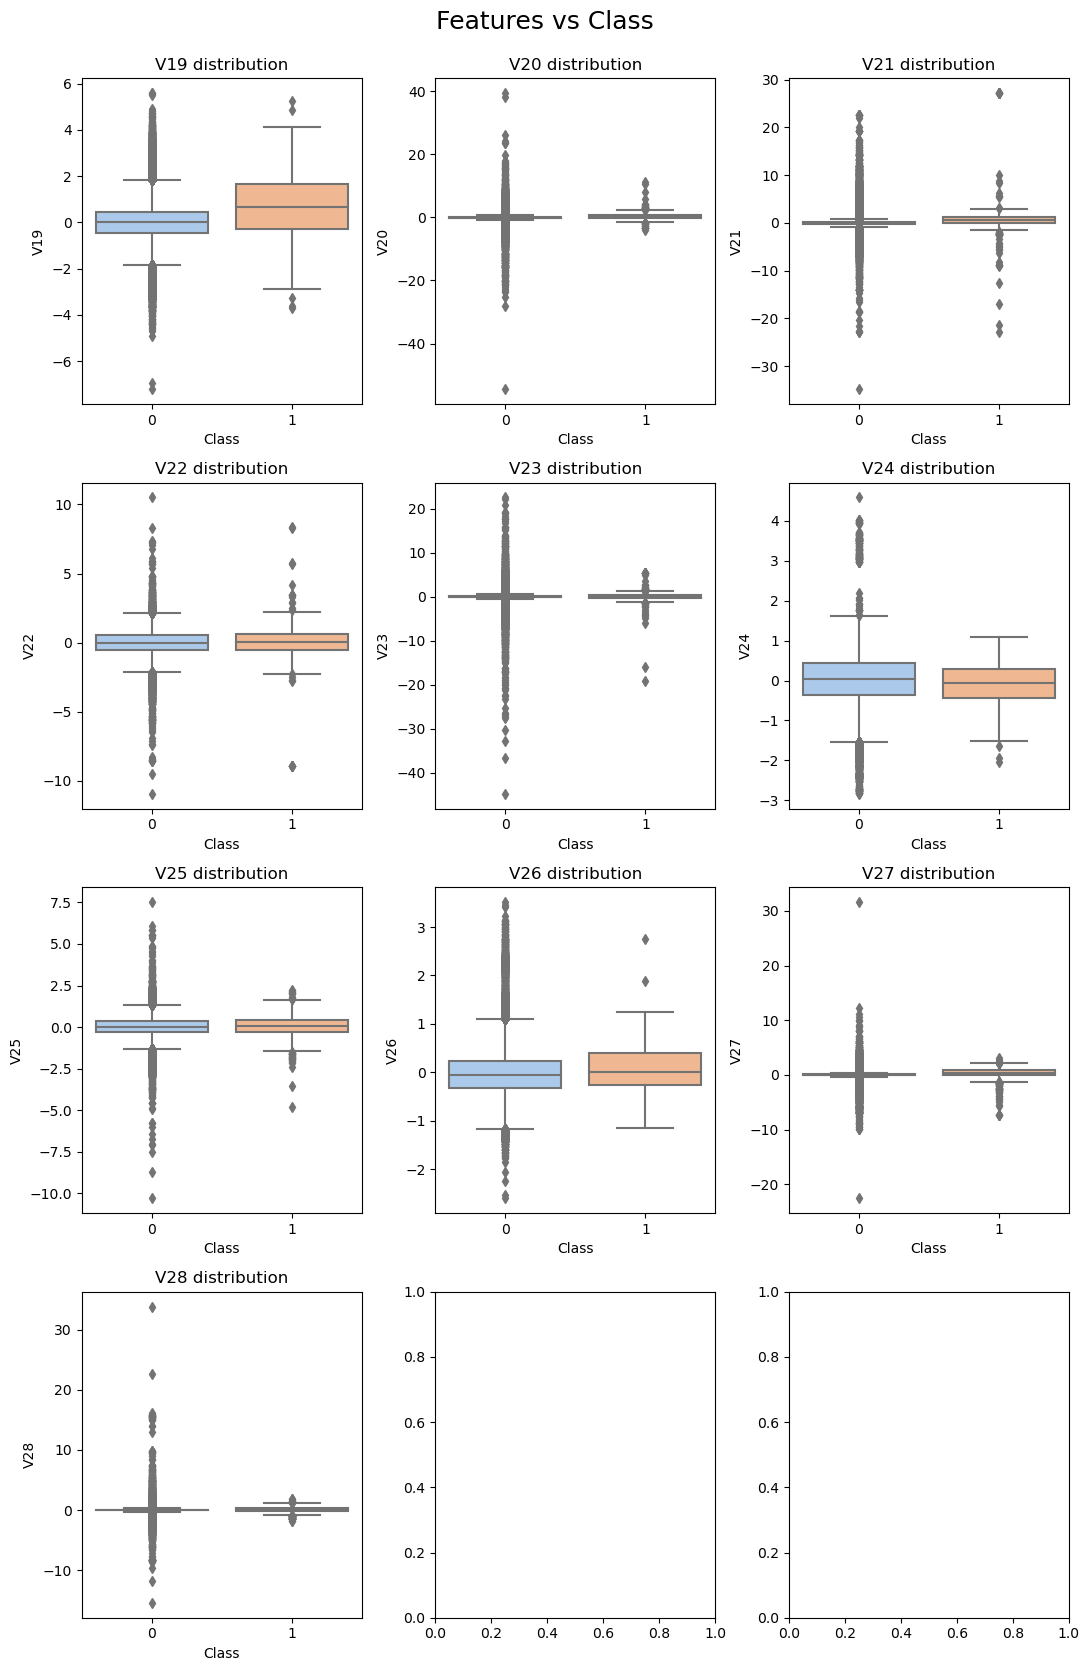

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V19', palette='pastel')
axes[0,0].set_title("V19 distribution");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V20', palette='pastel')
axes[0,1].set_title("V20 distribution");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V21', palette='pastel')
axes[0,2].set_title("V21 distribution");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V22', palette='pastel')
axes[1,0].set_title("V22 distribution");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V23', palette='pastel')
axes[1,1].set_title("V23 distribution");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V24', palette='pastel')
axes[1,2].set_title("V24 distribution");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V25', palette='pastel')
axes[2,0].set_title("V25 distribution");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V26', palette='pastel')
axes[2,1].set_title("V26 distribution");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V27', palette='pastel')
axes[2,2].set_title("V27 distribution");
sns.boxplot(ax=axes[3, 0], data=df, x='Class', y='V28', palette='pastel')
axes[3,0].set_title("V28 distribution");

plt.tight_layout()

it's clear that the features have outliers and processing.

#### Box Plot visualization

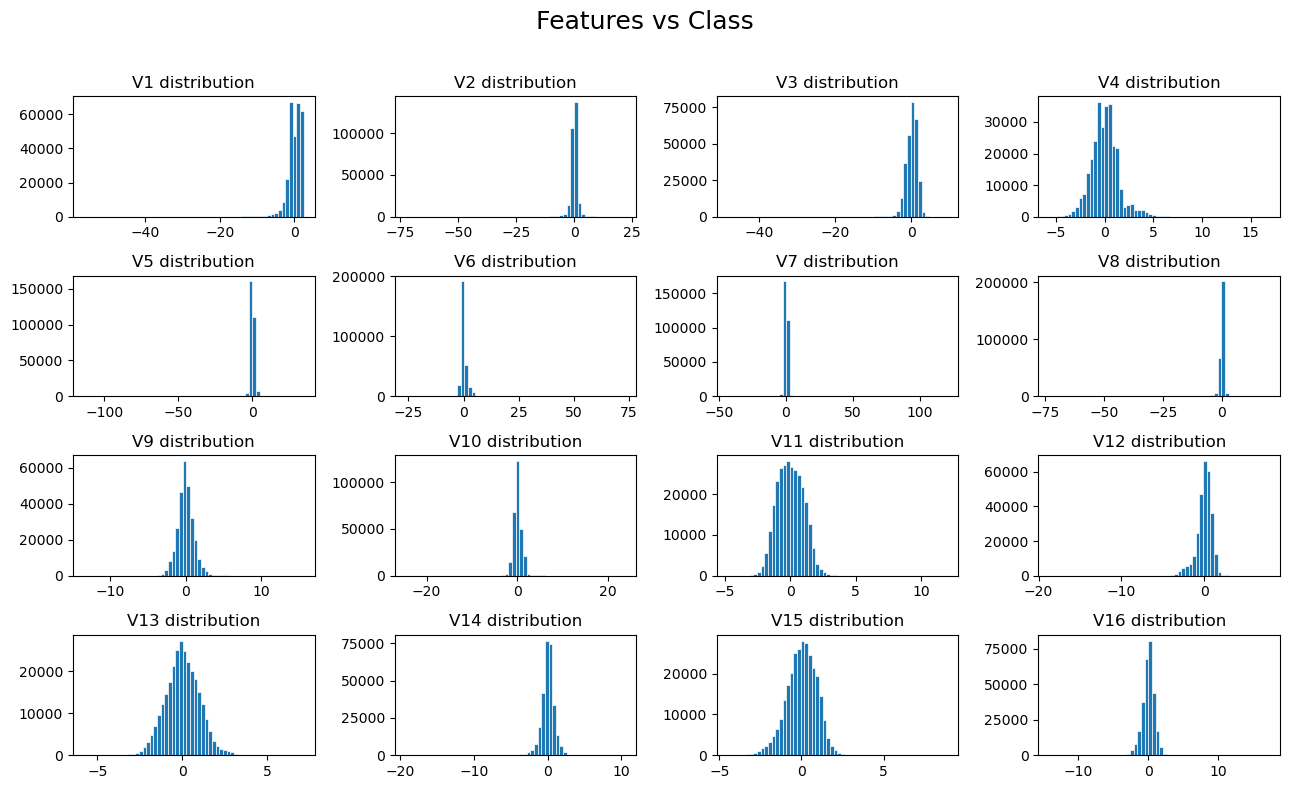

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(13,8))
fig.suptitle('Features vs Class\n', size = 18)

axes[0,0].hist(df['V1'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V1 distribution");

axes[0,1].hist(df['V2'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V2 distribution");

axes[0,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V3 distribution");

axes[0,3].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,3].set_title("V4 distribution");

axes[1,0].hist(df['V5'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V5 distribution");

axes[1,1].hist(df['V6'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V6 distribution");

axes[1,2].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V7 distribution");

axes[1,3].hist(df['V8'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,3].set_title("V8 distribution");

axes[2,0].hist(df['V9'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V9 distribution");

axes[2,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V10 distribution");

axes[2,2].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V11 distribution");

axes[2,3].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,3].set_title("V12 distribution");

axes[3,0].hist(df['V13'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("V13 distribution");

axes[3,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("V14 distribution");

axes[3,2].hist(df['V15'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("V15 distribution");

axes[3,3].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,3].set_title("V16 distribution");




plt.tight_layout()

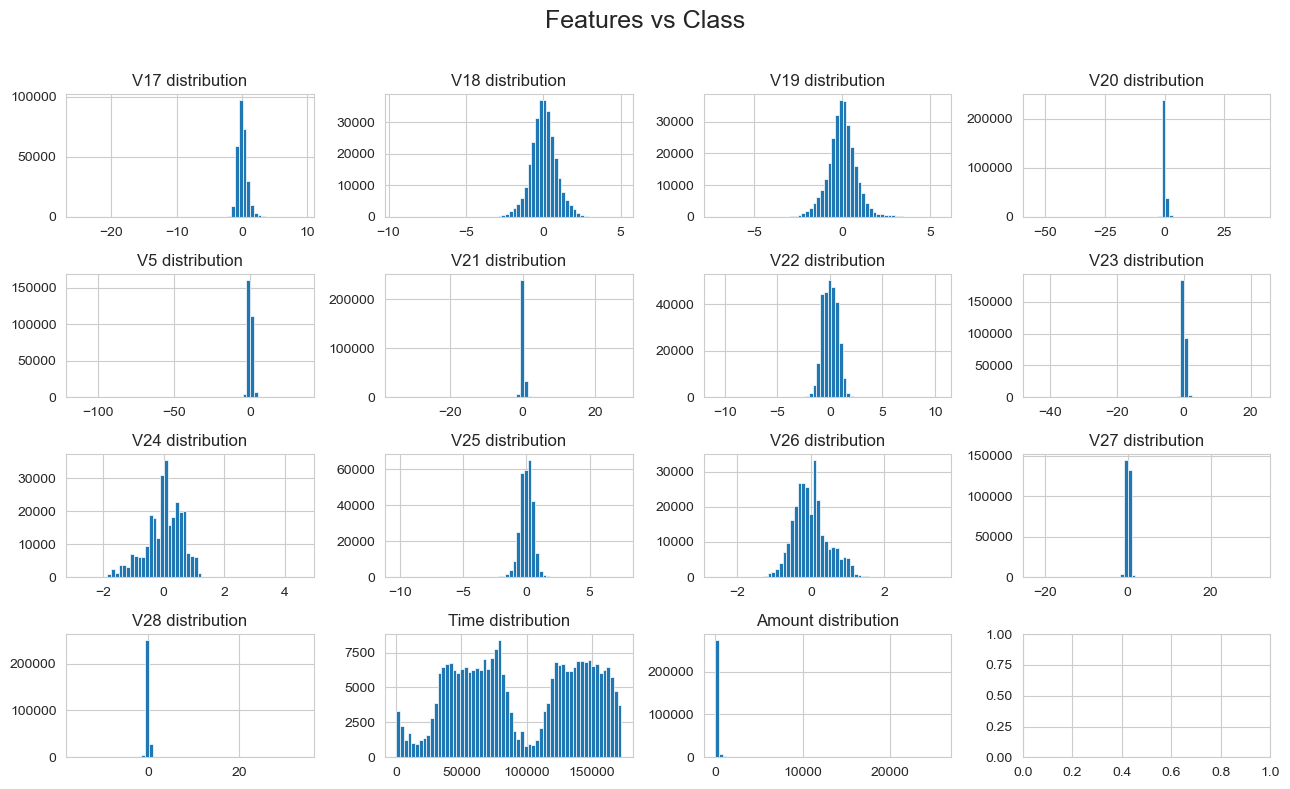

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(13,8))
fig.suptitle('Features vs Class\n', size = 18)

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V18'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V18 distribution");

axes[0,2].hist(df['V19'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V19 distribution");

axes[0,3].hist(df['V20'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,3].set_title("V20 distribution");

axes[1,0].hist(df['V5'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V5 distribution");

axes[1,1].hist(df['V21'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V21 distribution");

axes[1,2].hist(df['V22'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V22 distribution");

axes[1,3].hist(df['V23'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,3].set_title("V23 distribution");

axes[2,0].hist(df['V24'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V24 distribution");

axes[2,1].hist(df['V25'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V25 distribution");

axes[2,2].hist(df['V26'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V26 distribution");

axes[2,3].hist(df['V27'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,3].set_title("V27 distribution");

axes[3,0].hist(df['V28'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("V28 distribution");

axes[3,1].hist(df['Time'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("Time distribution");

axes[3,2].hist(df['Amount'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Amount distribution");


plt.tight_layout()

Due to the data are collected for fraud is very small comapred to non_Fraud, So outlier will removed just for non_fraud data.

In [ ]:
def remove_outlier (df):
  for col in df.columns:
      if df[col].dtype != 'object' :
        q1_value = df[col].quantile(0.25)
        q3_value = df[col].quantile(0.75)
        IQR = q3_value - q1_value
        min = q1_value -(1.5 *IQR)
        max = q3_value +(1.5 *IQR)
        df= df[ (df[col]>= min) & (df[col]<= max)]
  return df

In [ ]:
Non_frauds_df = remove_outlier(df)

In [ ]:
len(Non_frauds_df)

110109

Noticed that the data set records has been reduced to 110109 from 284315 after removing outliers

In [ ]:
modified_df = pd.concat([Non_frauds_df , frauds_df])

In [ ]:
len(modified_df)

110601

In [ ]:
modified_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0


testing data skewness and outliers.

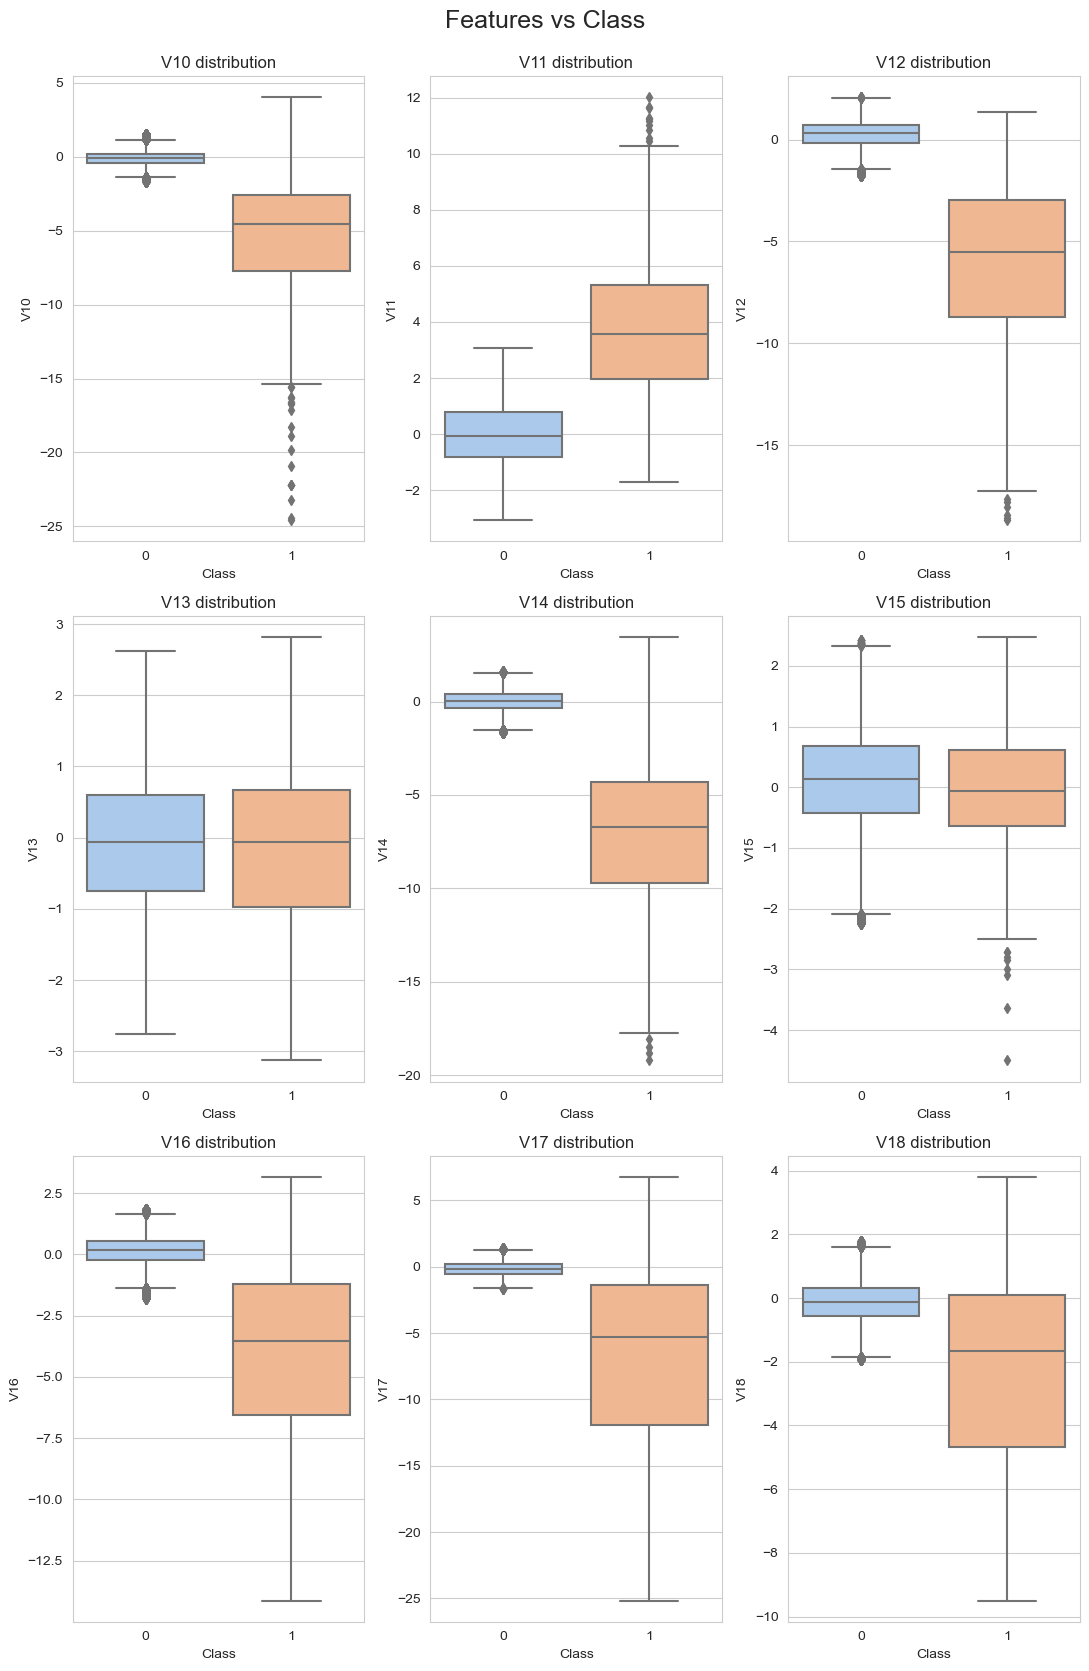

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=modified_df, x='Class', y='V10', palette='pastel')
axes[0,0].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 1], data=modified_df, x='Class', y='V11', palette='pastel')
axes[0,1].set_title("V11 distribution");

sns.boxplot(ax=axes[0, 2], data=modified_df, x='Class', y='V12', palette='pastel')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=modified_df, x='Class', y='V13', palette='pastel')
axes[1,0].set_title("V13 distribution");

sns.boxplot(ax=axes[1, 1], data=modified_df, x='Class', y='V14', palette='pastel')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=modified_df, x='Class', y='V15', palette='pastel')
axes[1,2].set_title("V15 distribution");

sns.boxplot(ax=axes[2, 0], data=modified_df, x='Class', y='V16', palette='pastel')
axes[2,0].set_title("V16 distribution");

sns.boxplot(ax=axes[2, 1], data=modified_df, x='Class', y='V17', palette='pastel')
axes[2,1].set_title("V17 distribution");

sns.boxplot(ax=axes[2, 2], data=modified_df, x='Class', y='V18', palette='pastel')
axes[2,2].set_title("V18 distribution");

plt.tight_layout()

Improvement is observed from visualiztion , So now we can go to next step.

### Correlation

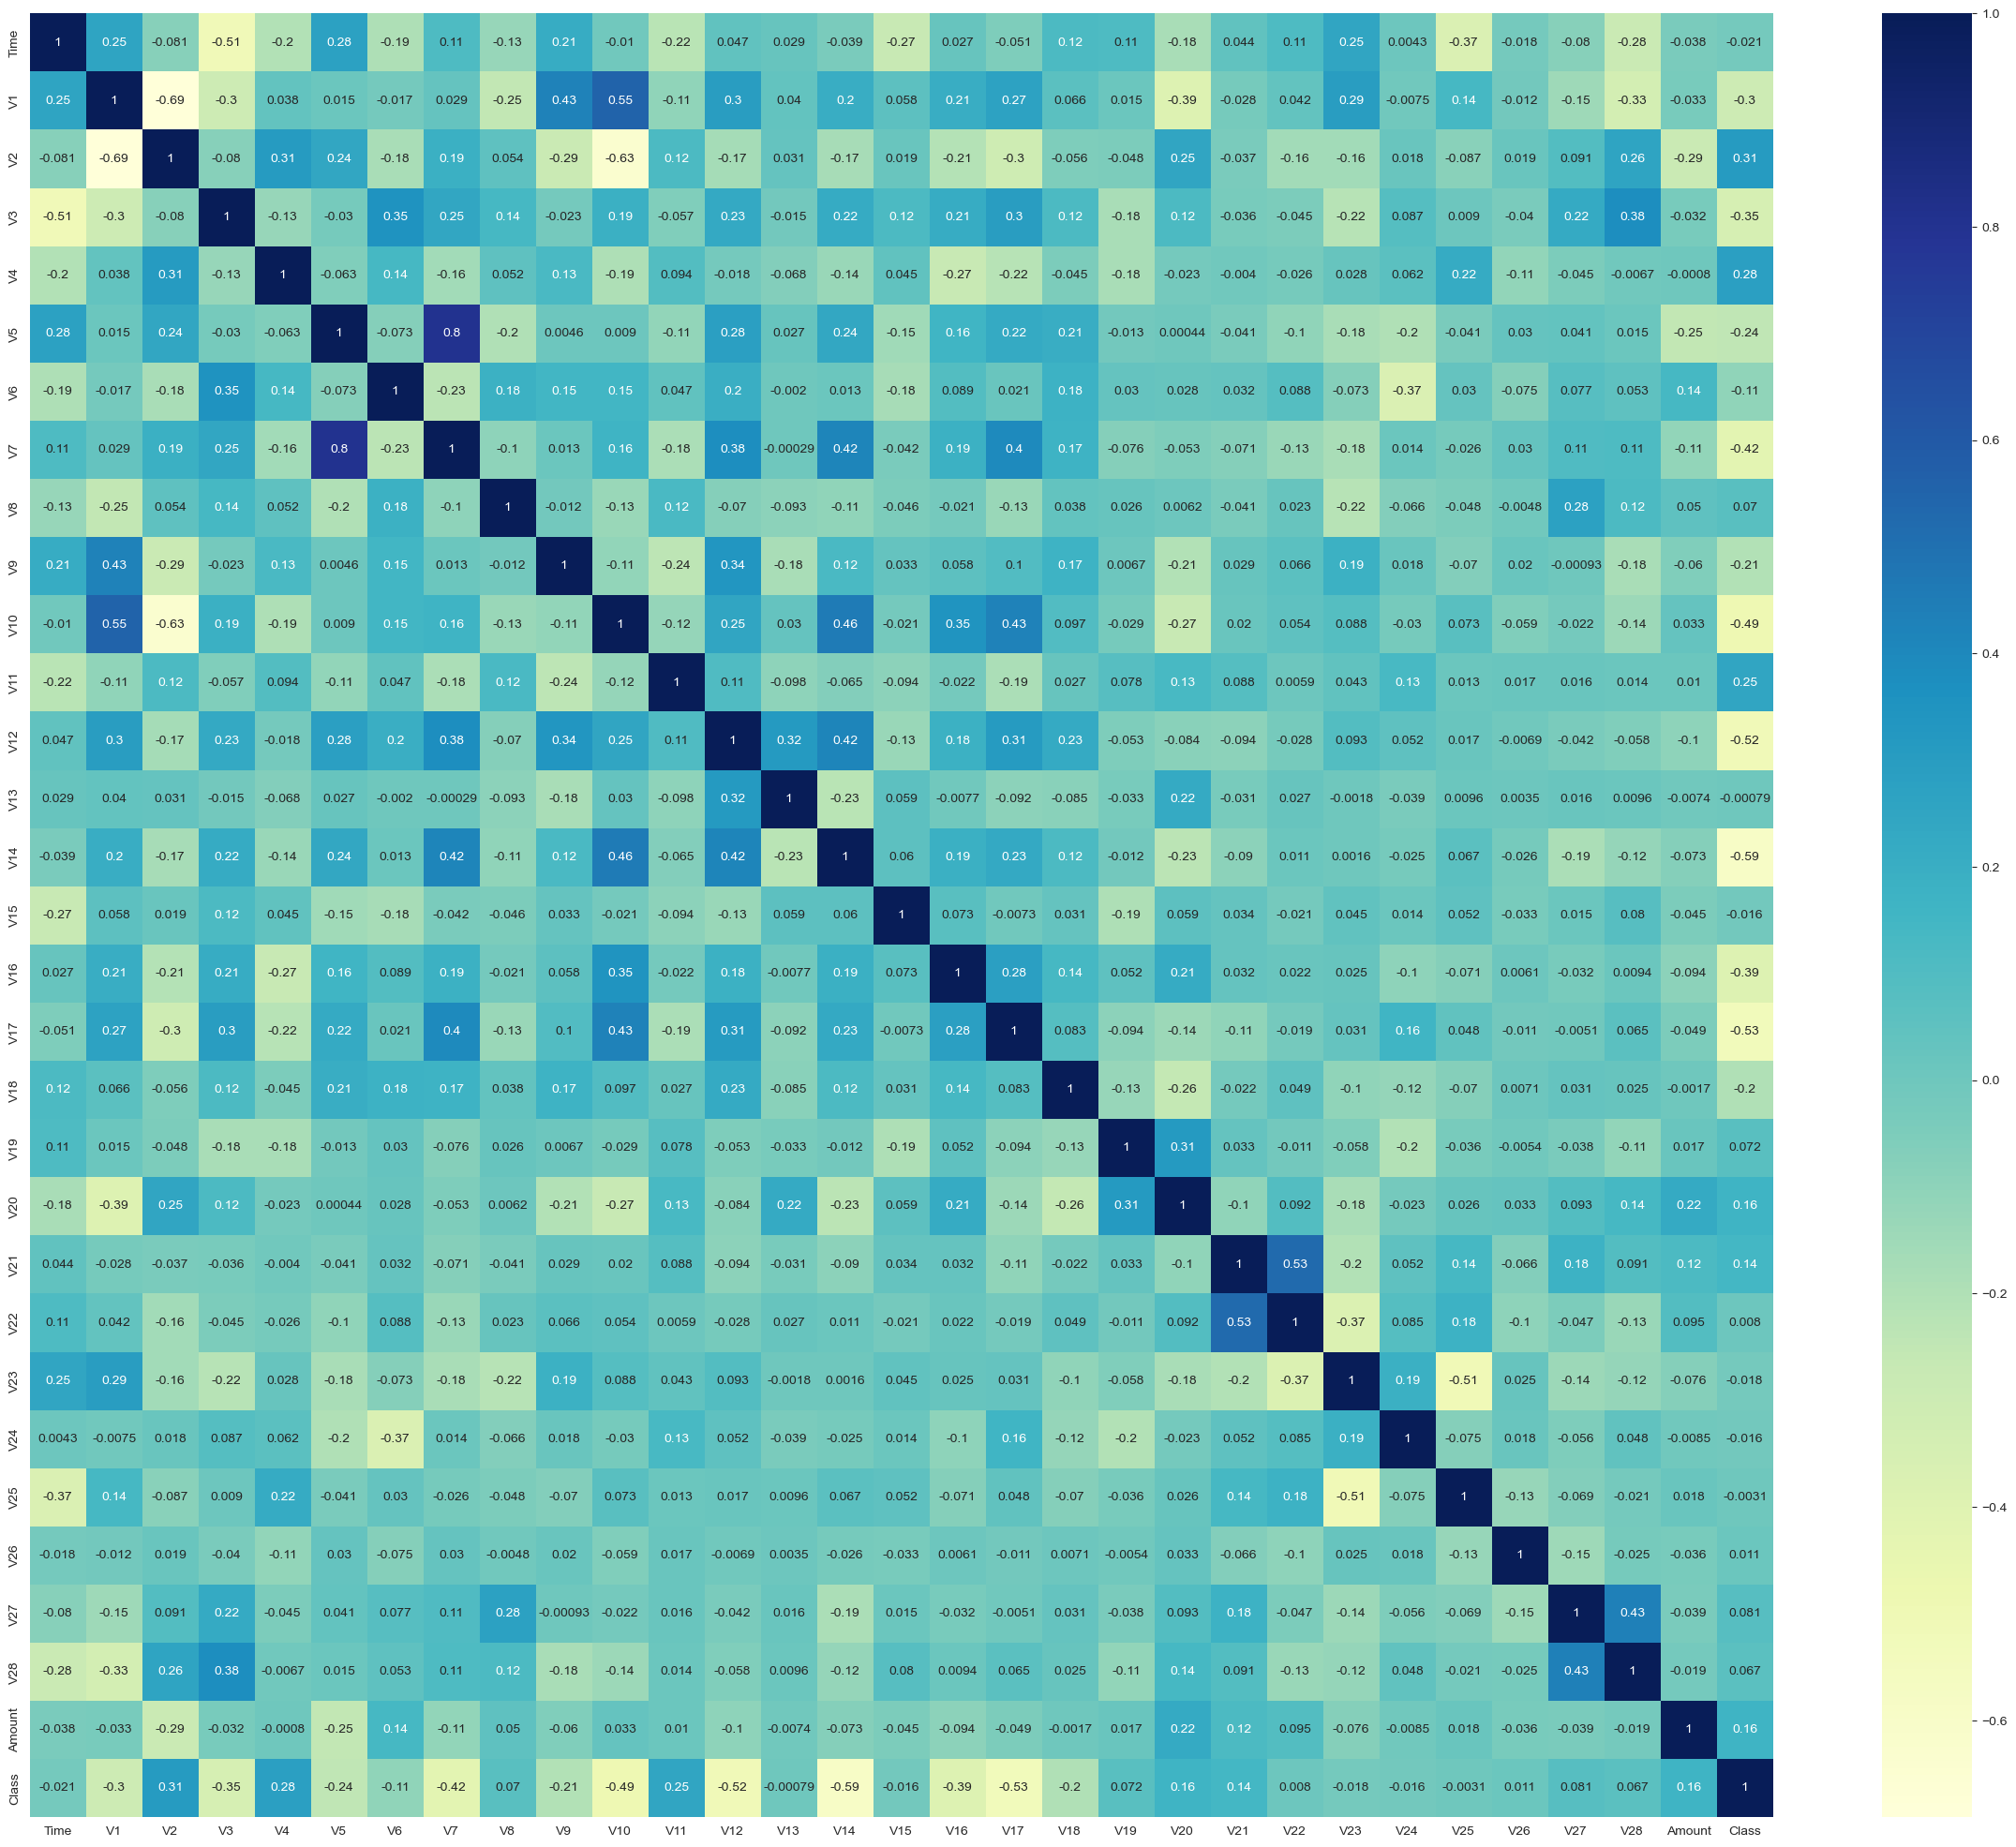

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(modified_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

The following Features have week correlation in given dataset, drop it will make model faster and avoid overfitting. 

In [ ]:
Correlated_df = modified_df.drop(columns = ['Time','V8','V13','V19','V22','V23','V24','V25','V26','V27','V28'], axis=1)

In [ ]:
Correlated_df.shape

(110601, 20)

In [ ]:
Correlated_df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V15,V16,V17,V18,V20,V21,Amount,Class
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.069083,-0.225775,2.69,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,-0.568671,-0.371407,1.341262,0.359894,-0.137134,0.517617,0.401726,-0.058133,0.068653,0.084968,-0.208254,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.464960,-0.099254,-1.416907,-0.153826,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.219633,-0.167716,4.99,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,-0.736727,-0.366846,1.017614,0.836390,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.203711,-0.246914,3.68,0
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-2.094011,1.323729,0.227666,-0.242682,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.102756,-0.231809,121.50,0


The Number of features has been reduced to 20 instead of 31

## Split Imbalanced data set

In [ ]:
FraudCorrelated_df=Correlated_df[Correlated_df['Class']==1]

In [ ]:
FraudCorrelated_df.shape

(492, 20)

In [ ]:
NonFraudCorrelated_df=Correlated_df[Correlated_df['Class']==0]
NonFraudCorrelated_df.shape

(110109, 20)

In [ ]:
input_df = df.drop(columns = ['Class'], axis=1)
label = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(input_df, label, test_size=0.2, random_state=42)

In [ ]:
# Split the temporary data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

In [ ]:
len(y_train[y_train==1])

In [ ]:
len( y_test[y_test==1])

In [ ]:
len(y_val[y_val==1])

Normalization

In [ ]:

scaler1 = MinMaxScaler()
# Fit and transform the scaler on training data
X_train_scaled = scaler1.fit_transform(X_train)

# Transform validation and test data using the same scaler
X_val_scaled = scaler1.transform(X_val)
X_test_scaled = scaler1.transform(X_test)

In [ ]:
X_val_scaled

array([[4.00871573e-01, 9.78453289e-01, 7.69098273e-01, ...,
        2.39315998e-01, 3.13368785e-01, 5.89697001e-04],
       [4.02706159e-01, 9.81026202e-01, 7.64484300e-01, ...,
        2.36440781e-01, 3.13086151e-01, 3.89238944e-04],
       [7.47839876e-02, 9.45192616e-01, 7.82002869e-01, ...,
        2.44724537e-01, 3.12813447e-01, 3.48758094e-04],
       ...,
       [3.88706588e-01, 9.76742637e-01, 7.67863988e-01, ...,
        2.38512318e-01, 3.13887952e-01, 3.11352232e-03],
       [3.32719875e-01, 9.48249796e-01, 7.78723999e-01, ...,
        2.41477336e-01, 3.14640588e-01, 3.38637882e-04],
       [9.97893409e-01, 9.57922452e-01, 7.72375263e-01, ...,
        2.35979511e-01, 3.10377043e-01, 1.66633192e-03]])

In [ ]:
X_train_scaled

array([[7.74907258e-01, 9.89378250e-01, 7.63912939e-01, ...,
        2.39313775e-01, 3.12772147e-01, 2.02404251e-03],
       [7.98311255e-01, 9.45707171e-01, 7.77640730e-01, ...,
        2.39401376e-01, 3.14750646e-01, 5.44545283e-04],
       [8.17571517e-01, 9.41459370e-01, 7.80078494e-01, ...,
        2.38755263e-01, 3.14619007e-01, 6.97905427e-04],
       ...,
       [3.04790180e-01, 9.40260256e-01, 7.77587227e-01, ...,
        2.45774444e-01, 3.15461272e-01, 9.73097361e-04],
       [8.54269030e-01, 9.93661599e-01, 7.65900074e-01, ...,
        2.36585959e-01, 3.11518482e-01, 3.49925811e-04],
       [6.19123681e-01, 9.59213896e-01, 7.78139289e-01, ...,
        2.43841314e-01, 3.14979203e-01, 6.96737711e-05]])

In [ ]:
X_test_scaled 

array([[2.40197695e-01, 6.77528885e-01, 8.57842505e-01, ...,
        1.89765218e-01, 2.91962161e-01, 1.41756931e-02],
       [2.56147600e-01, 9.64066764e-01, 7.38307801e-01, ...,
        2.39384538e-01, 3.15194526e-01, 2.02450960e-02],
       [2.05352131e-01, 9.82071084e-01, 7.61025596e-01, ...,
        2.38671722e-01, 3.13217906e-01, 1.20664073e-03],
       ...,
       [8.24637857e-01, 9.58980829e-01, 7.66100482e-01, ...,
        2.47018083e-01, 3.20315314e-01, 2.96989315e-04],
       [3.42355794e-01, 9.49883532e-01, 7.77719956e-01, ...,
        2.39373297e-01, 3.07649291e-01, 1.39736781e-04],
       [2.82786719e-01, 9.31273395e-01, 7.77729817e-01, ...,
        2.41426438e-01, 3.00801391e-01, 3.52771148e-02]])

In [ ]:
y_train

201477    0
210354    0
218330    0
237957    0
121958    0
         ..
131478    0
239193    0
67705     0
233557    0
155997    0
Name: Class, Length: 170883, dtype: int64

In [ ]:
y_val 

104878    0
105552    0
9128      0
201800    0
60023     0
         ..
44523     0
77956     0
99541     0
78359     0
284419    0
Name: Class, Length: 56962, dtype: int64

In [ ]:
y_val 

104878    0
105552    0
9128      0
201800    0
60023     0
         ..
44523     0
77956     0
99541     0
78359     0
284419    0
Name: Class, Length: 56962, dtype: int64

# AI TASK >>>>>>>>>>>>>

In [ ]:
pip install imbalanced-learn

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# # Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Apply Random Under-sampling for undersampling
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
rus = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_smote, y_train_smote)
model = RandomForestClassifier(n_estimators=100, random_state=42)
history=model.fit(X_train_resampled, y_train_resampled)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have model, X_test, y_test, and y_pred defined

# Get the predicted labels
# y_pred = model.predict(X_test)
y_pred_scaled = model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_scaled.round())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_scaled.round()))